
# Level 1 – Task 3: Geospatial Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
df = pd.read_csv("Dataset data science.csv")
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]


## Step 1: Clean Geolocation Data (Latitude/Longitude)

In [4]:
df_map = df.dropna(subset=['Latitude', 'Longitude'])

## Step 2: Plot Restaurants on a Map Using Folium

In [5]:
# Center of the map
map_center = [df_map['Latitude'].mean(), df_map['Longitude'].mean()]

restaurant_map = folium.Map(location=map_center, zoom_start=2)

# Add points
for _, row in df_map.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=1,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(restaurant_map)

restaurant_map


## Step 3: Number of Restaurants per City

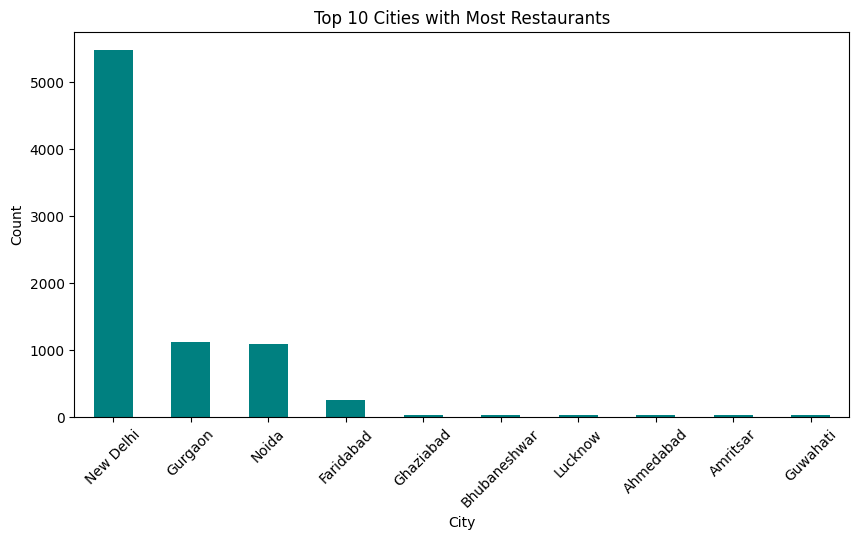

In [6]:
city_counts = df['City'].value_counts().head(10)
city_counts.plot(kind='bar', figsize=(10,5), color='teal')
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Step 4: Correlation Between Location and Rating (City-wise)

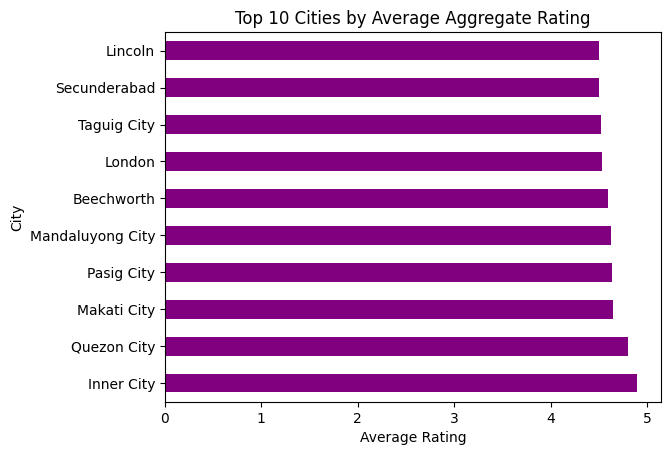

In [7]:
city_avg_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

city_avg_rating.plot(kind='barh', color='purple')
plt.title("Top 10 Cities by Average Aggregate Rating")
plt.xlabel("Average Rating")
plt.show()
